**Formula 1 Race Simulator Version 1.2.**


Lap by Lap Top 5 Insights:
Lap 1: Top 5
  Position 1: Driver14 - Lap Time: 78.91611642109311
  Position 2: Driver8 - Lap Time: 80.42904914566392
  Position 3: Driver20 - Lap Time: 80.45094165550567
  Position 4: Driver16 - Lap Time: 81.45939223456969
  Position 5: Driver5 - Lap Time: 84.06079437649542
Lap 2: Top 5
  Position 1: Driver8 - Lap Time: 78.48936312069381
  Position 2: Driver20 - Lap Time: 82.54938167507719
  Position 3: Driver14 - Lap Time: 82.67961668639606
  Position 4: Driver16 - Lap Time: 83.56807216096178
  Position 5: Driver10 - Lap Time: 84.13483379775751
Lap 3: Top 5
  Position 1: Driver8 - Lap Time: 78.80844323726184
  Position 2: Driver20 - Lap Time: 78.91357858135603
  Position 3: Driver14 - Lap Time: 79.38443623048559
  Position 4: Driver16 - Lap Time: 82.52834106586025
  Position 5: Driver5 - Lap Time: 82.86391743763916
Lap 4: Top 5
  Position 1: Driver8 - Lap Time: 77.5291555527133
  Position 2: Driver14 - Lap Time: 79.99750052334484
  Position 3: Driver20 - L

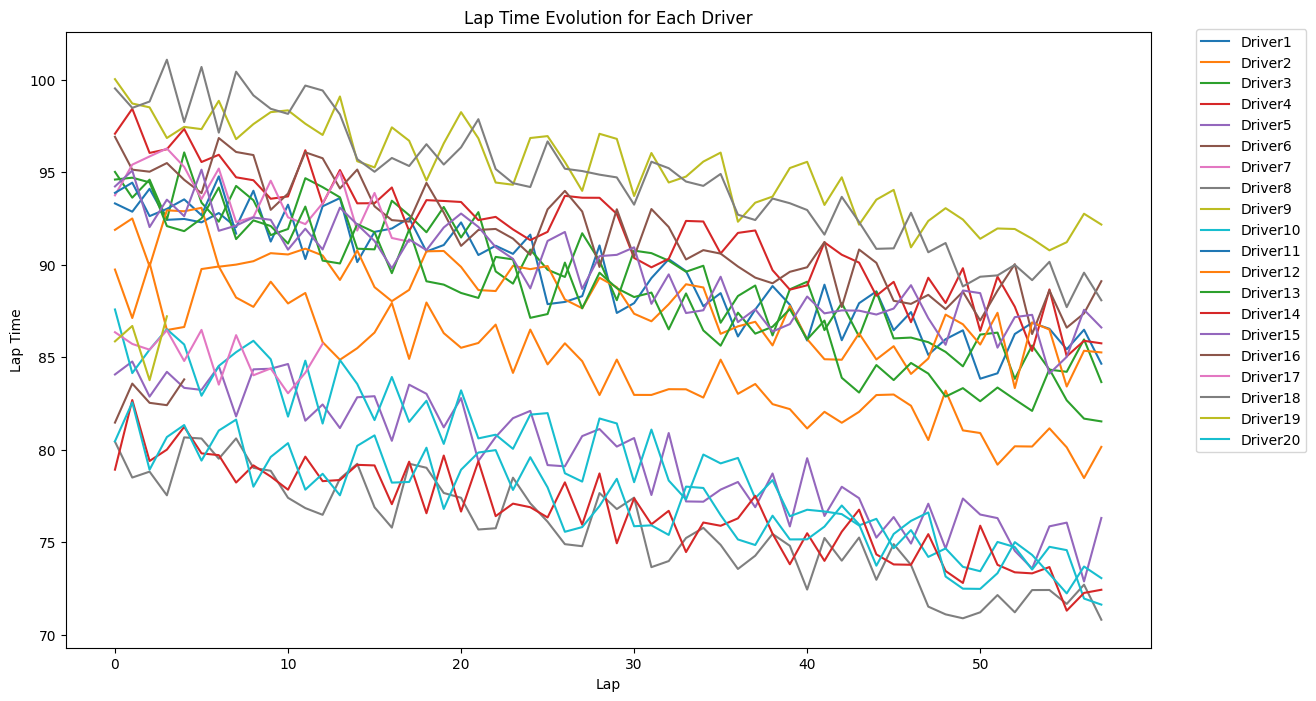

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Setup global variables
total_dnfs = 0
max_dnfs = 5
num_laps = 58
initial_fuel_weight = 100
points_system = [25, 18, 15, 12, 10, 8, 6, 4, 2, 1]

# Generate drivers dictionary
num_drivers = 20
teams = [f"Team{i}" for i in range(1, 11)]
qualifying_positions = random.sample(range(1, num_drivers + 1), num_drivers)

drivers = {}
for i in range(num_drivers):
    team_index = i // 2
    drivers[f"Driver{i+1}"] = {
        "team": teams[team_index],
        "performance": random.randint(80, 100),
        "fuel": initial_fuel_weight,
        "qualifying": qualifying_positions[i],
        "tire_wear_rate": random.uniform(0.1, 0.2),
        "fuel_consumption_per_lap": random.uniform(0.2, 0.3)
    }

# Simulation functions
def simulate_lap(driver_info, lap):
    global total_dnfs
    tire_wear_impact = driver_info["tire_wear_rate"] * lap
    fuel_remaining = driver_info["fuel"] - (driver_info["fuel_consumption_per_lap"] * lap)
    weight_impact = (initial_fuel_weight - fuel_remaining) * 0.1
    lap_time = driver_info["performance"] - tire_wear_impact - weight_impact + random.uniform(-2, 2)

    if total_dnfs < max_dnfs and random.random() < 0.01:
        total_dnfs += 1
        return None, True
    return lap_time, False

def simulate_race():
    driver_performance = {driver: {"lap_times": [], "DNF": False} for driver in drivers}
    fastest_lap = {"driver": None, "time": float('inf')}
    lap_insights = []

    for lap in range(1, num_laps + 1):
        lap_results = []
        for driver, info in sorted(drivers.items(), key=lambda x: x[1]["qualifying"]):
            if driver_performance[driver]["DNF"]:
                continue
            lap_time, dnf = simulate_lap(info, lap)
            if dnf:
                driver_performance[driver]["DNF"] = True
            else:
                driver_performance[driver]["lap_times"].append(lap_time)
                if lap_time < fastest_lap["time"]:
                    fastest_lap = {"driver": driver, "time": lap_time}
            lap_results.append((driver, lap_time if not dnf else None))

        lap_results.sort(key=lambda x: x[1] if x[1] is not None else float('inf'))
        top_5 = lap_results[:5]
        lap_insights.append({"lap": lap, "top_5": top_5})

    return driver_performance, fastest_lap, lap_insights

def display_final_results(driver_performance, fastest_lap):
    print("Final Race Results:")
    for driver, data in sorted(driver_performance.items(), key=lambda x: (x[1]["DNF"], sum(y if y is not None else np.inf for y in x[1]["lap_times"]))):
        final_time = sum(data["lap_times"]) if not data["DNF"] else "DNF"
        print(f"{driver}: Final Time: {final_time}")
    print(f"\nFastest Lap: {fastest_lap['driver']} with a time of {fastest_lap['time']:.2f}")

def display_lap_by_lap_insights(lap_insights):
    print("\nLap by Lap Top 5 Insights:")
    for insight in lap_insights:
        print(f"Lap {insight['lap']}: Top 5")
        for position, (driver, time) in enumerate(insight["top_5"], start=1):
            print(f"  Position {position}: {driver} - Lap Time: {time if time else 'DNF'}")

def plot_performance_lap_by_lap(driver_performance):
    plt.figure(figsize=(14, 8))
    for driver, data in driver_performance.items():
        times = [time if time is not None else np.nan for time in data["lap_times"]]
        plt.plot(times, label=driver)
    plt.xlabel('Lap')
    plt.ylabel('Lap Time')
    plt.title('Lap Time Evolution for Each Driver')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.015))
    plt.show()

# Run the race simulation
driver_performance, fastest_lap, lap_insights = simulate_race()

# Display insights and results
display_lap_by_lap_insights(lap_insights)
display_final_results(driver_performance, fastest_lap)

# Visualize performance lap by lap
plot_performance_lap_by_lap(driver_performance)
